# Regresión Lineal Simple

En este notebook se aplica un modelo de **Regresión Lineal Simple** utilizando el dataset [Global Air Pollution][kaggle] de Kaggle.

[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

#### **Objetivo del Notebook**

El objetivo de este notebook es investigar la relación entre las concentraciones de **Ozone AQI Value** y **PM2.5 AQI Value** a través de la aplicación de un modelo de regresión lineal. A lo largo del análisis, se realiza el ajuste del modelo, el cálculo de los coeficientes de la recta y la evaluación de la calidad del ajuste mediante métricas como el **Error Cuadrático Medio (MSE)** y el **Coeficiente de Determinación (R²)**.

#### **Descripción del Proceso**

1. **Selección de las Variables**:
   - Se seleccionan las variables **Ozone AQI Value** como la variable independiente (X) y **PM2.5 AQI Value** como la variable dependiente (Y), basándonos en la hipótesis de que los niveles de ozono pueden influir en los niveles de partículas finas PM2.5 en el aire.

2. **Visualización**:
   - Se realiza un **gráfico de dispersión** para observar visualmente la relación entre las dos variables seleccionadas, permitiendo una evaluación inicial de la posible relación.

3. **Modelo de Regresión Lineal**:
   - Se ajusta un modelo de regresión lineal simple que predice los valores de **PM2.5 AQI Value** en función de los valores de **Ozone AQI Value**.
   - Se calculan los coeficientes de la recta de regresión:
     - **Pendiente (β₁)**: Representa el cambio promedio en la variable dependiente (Y) por cada unidad adicional en la variable independiente (X).
     - **Intersección (β₀)**: Valor estimado de Y cuando X es igual a 0.

4. **Evaluación del Modelo**:
   - Se calcula el **Error Cuadrático Medio (MSE)** para medir el error promedio de las predicciones.
   - Se calcula el **Coeficiente de Determinación (R²)** para evaluar qué proporción de la variabilidad en **PM2.5 AQI** es explicada por **Ozone AQI**.
   - Se interpreta el coeficiente de correlación (**r**), que mide la fuerza de la relación lineal entre las dos variables.

#### **Resultados Esperados**

Al terminar este notebook, se obtendrán los siguientes resultados:
- La ecuación de la recta de regresión que mejor ajusta los datos.
- Una evaluación estadística del poder predictivo del modelo, determinando si **Ozone AQI** puede explicar de manera significativa la variabilidad en **PM2.5 AQI**.
- Visualización de la recta de regresión ajustada junto con los puntos de datos reales, lo que permitirá observar la calidad del ajuste.

#### **Conclusiones**

Este notebook permitirá obtener conclusiones sobre la relación entre el ozono y las partículas PM2.5 en el aire y si la **Regresión Lineal Simple** es adecuada para modelar esta relación en este contexto.


### Importación de Librerías

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np

### Importación del Dataset Limpio

In [33]:
df = pd.read_csv("../data/dataset_clean.csv")

### Selección de las columnas para X (independiente) e Y (dependiente)


In [34]:
X = df[['Ozone AQI Value']]  # Variable independiente
Y = df['PM2.5 AQI Value']    # Variable dependiente

### Análisis de distribución de las variables

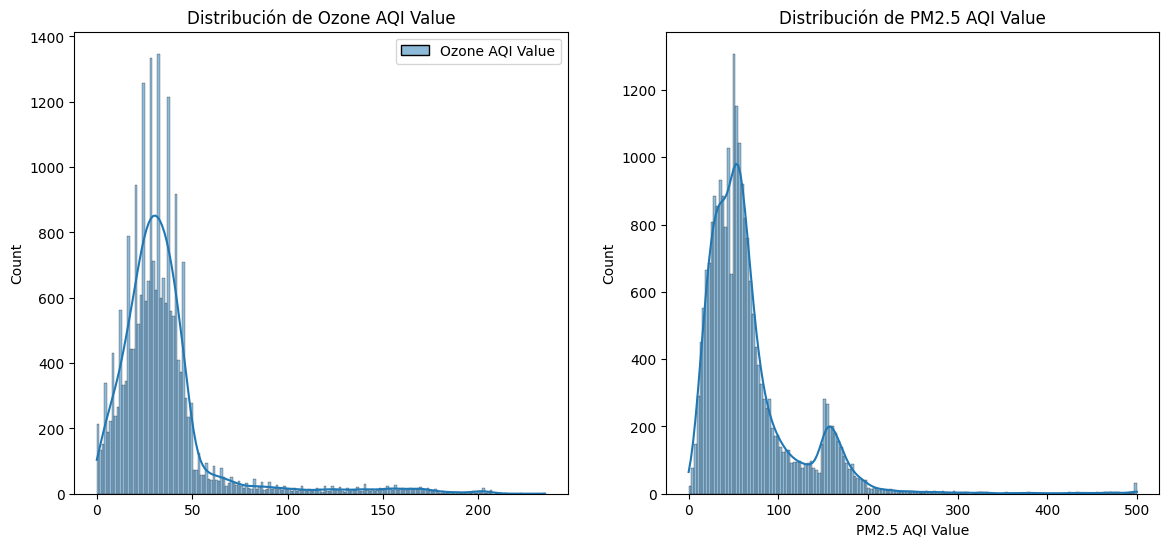

In [35]:
plt.figure(figsize=(14, 6))

# Distribución de la variable X (Ozone AQI Value)
plt.subplot(1, 2, 1)
sns.histplot(X, kde=True)
plt.title('Distribución de Ozone AQI Value')

# Distribución de la variable Y (PM2.5 AQI Value)
plt.subplot(1, 2, 2)
sns.histplot(Y, kde=True)
plt.title('Distribución de PM2.5 AQI Value')

plt.show()

### Gráfico de dispersión entre Ozone AQI y PM2.5 AQI


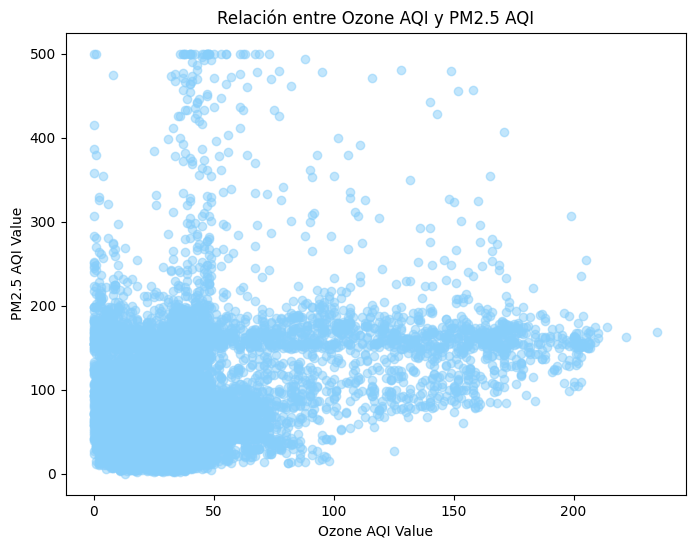

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, color='lightskyblue')
plt.title('Relación entre Ozone AQI y PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

### Cálculos Explicitos

#### Calcular las medias de X (Ozone AQI) e Y (PM2.5 AQI)

In [37]:
mean_X = np.mean(X['Ozone AQI Value'])
mean_Y = np.mean(Y)
print(f"Media de X (Ozone AQI): {mean_X:.2f}")
print(f"Media de Y (PM2.5 AQI): {mean_Y:.2f}")

Media de X (Ozone AQI): 35.19
Media de Y (PM2.5 AQI): 68.52


#### Calcular la covarianza entre X e Y

In [38]:
cov_XY = np.cov(X['Ozone AQI Value'], Y)[0, 1]
print(f"Covarianza entre X e Y: {cov_XY:.2f}")

Covarianza entre X e Y: 523.35


#### Calcular de la varianza de X

In [39]:
var_X = np.var(X['Ozone AQI Value'], ddof=1)
print(f"Varianza de X: {var_X:.2f}")

Varianza de X: 789.56


#### Calcular de los coeficientes de la recta (pendiente β₁ y la intersección β₀)

In [40]:
pendiente_manual = cov_XY / var_X
interseccion_manual = mean_Y - pendiente_manual * mean_X

print(f"Pendiente calculada manualmente (β₁): {pendiente_manual:.2f}")
print(f"Intersección calculada manualmente (β₀): {interseccion_manual:.2f}")

Pendiente calculada manualmente (β₁): 0.66
Intersección calculada manualmente (β₀): 45.19


 #### Imprimir la ecuación explícita de la recta

In [41]:
print(f"Ecuación de la recta: Y = {interseccion_manual:.2f} + {pendiente_manual:.2f}X")

Ecuación de la recta: Y = 45.19 + 0.66X


### Utilizamos sklearn para comparar los resultados

### Planteamiento del Modelo de Regresión Lineal

In [42]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Se crea el modelo de regresión lineal
model = LinearRegression()

# Se ajusta el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Predicciones con los datos de prueba
Y_pred = model.predict(X_test)

### Calcular los valores de los coeficientes de regresión

In [43]:
pendiente = model.coef_[0]
interseccion = model.intercept_
print("Coeficiente (pendiente):", pendiente)
print("Valor de la intersección:", interseccion)

Coeficiente (pendiente): 0.6551942828418219
Valor de la intersección: 45.543357633161065


### Calcular el coeficiente de correlación de Pearson (r)

In [44]:
r, _ = pearsonr(X['Ozone AQI Value'], Y)
print(r)

0.3398881956705154


### Imprimir la ecuación de la recta y el valor de r

In [45]:
print(f"Ecuación de la recta: Y = {interseccion:.2f} + {pendiente:.2f}X")
print(f"Coeficiente de correlación (r): {r:.2f}")

Ecuación de la recta: Y = 45.54 + 0.66X
Coeficiente de correlación (r): 0.34


### Evaluación del modelo

In [46]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 2816.19686733953
Coeficiente de Determinación (R²): 0.1174933821055496


### Gráfico de Dispersión y Recta de Tendencia

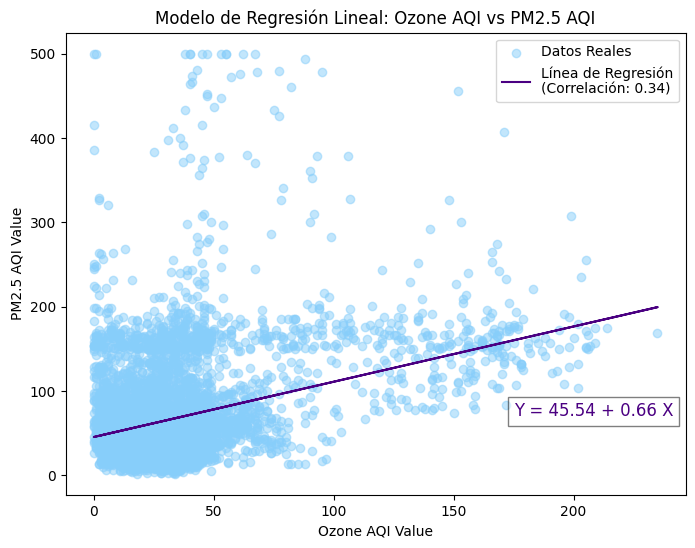

In [60]:
# Gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='lightskyblue', alpha=0.5, label='Datos Reales')
plt.plot(X_test, Y_pred, color='indigo', label=f'Línea de Regresión\n(Correlación: {r:.2f})')

equation_text = f"Y = {interseccion:.2f} + {pendiente:.2f} X"
plt.text(175, 70, equation_text, fontsize=12, color='indigo', bbox=dict(facecolor='white', alpha=0.5))

plt.title('Modelo de Regresión Lineal: Ozone AQI vs PM2.5 AQI')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')

# Actualización de la leyenda
plt.legend(loc='best')  
plt.show()

### Gráfico de dispersión con la línea de regresión y zonas de extrapolación


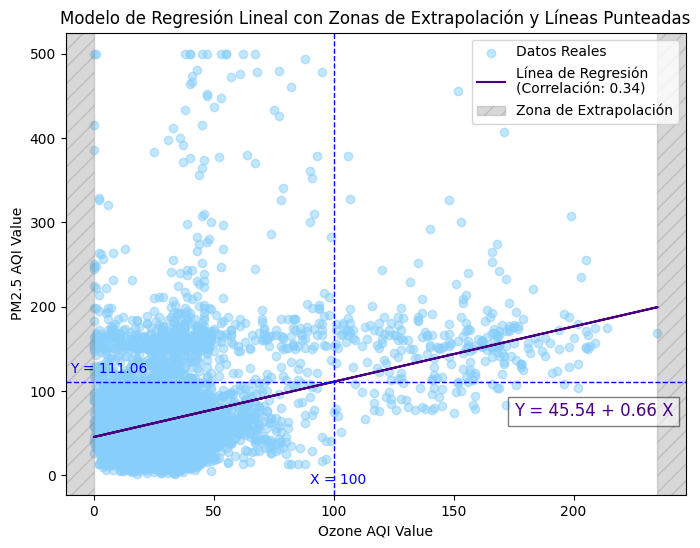

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='lightskyblue', alpha=0.5, label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, Y_pred, color='indigo', label=f'Línea de Regresión\n(Correlación: {r:.2f})')

# Añadir la ecuación de la recta en el gráfico
equation_text = f"Y = {interseccion:.2f} + {pendiente:.2f} X"
plt.text(175, 70, equation_text, fontsize=12, color='indigo', bbox=dict(facecolor='white', alpha=0.5))

# Añadir zonas de extrapolación (valores fuera del rango observado en los datos) con franjas diagonales
plt.axvspan(X_test.min().values[0] - 50, X_test.min().values[0], color='gray', alpha=0.3, label='Zona de Extrapolación', hatch='//')
plt.axvspan(X_test.max().values[0], X_test.max().values[0] + 50, color='gray', alpha=0.3, hatch='//')

# Se selecciona un valor de X y calculamos su Y correspondiente en la recta de regresión
x_value = 100  # Cambiar este valor según el valor en X que quieras marcar
y_value = interseccion + pendiente * x_value  # Cálculo de Y a partir de la ecuación de la recta

# Añadir líneas punteadas desde el eje X y el eje Y
plt.axhline(y=y_value, color='blue', linestyle='--', lw=1)  # Línea horizontal desde la recta hacia el eje Y
plt.axvline(x=x_value, color='blue', linestyle='--', lw=1)  # Línea vertical desde la recta hacia el eje X

# Etiquetas para las líneas punteadas
plt.text(x_value - 10, -10, f'X = {x_value}', color='blue', fontsize=10)
plt.text(-10, y_value + 10, f'Y = {y_value:.2f}', color='blue', fontsize=10)

plt.title('Modelo de Regresión Lineal con Zonas de Extrapolación')
plt.xlabel('Ozone AQI Value')
plt.ylabel('PM2.5 AQI Value')

plt.legend(loc='best')  


plt.show()



### Explicación del Modelo

El **modelo de regresión lineal** que hemos realizado tiene como objetivo investigar la relación entre las variables **Ozone AQI Value** (valor del índice de calidad del aire para ozono) y **PM2.5 AQI Value** (valor del índice de calidad del aire para partículas finas PM2.5) utilizando una regresión lineal simple. Este tipo de modelo se basa en ajustar una línea recta que minimice la distancia entre los valores predichos por el modelo y los valores reales.

#### 1. Ecuación de la recta de regresión

El modelo ajustado tiene la siguiente ecuación:

$$ Y = \beta_0 + \beta_1 X $$

donde:
- **Y** es la variable dependiente (**PM2.5 AQI Value**).
- **X** es la variable independiente (**Ozone AQI Value**).
- **β₀** es la ordenada al origen o el valor de Y cuando X es igual a 0.
- **β₁** es el coeficiente de la pendiente, que indica el cambio promedio en Y por cada unidad adicional en X.

A partir del modelo, la ecuación de la recta es:

$$ Y = 45.54 + 0.66 X $$

- **Interpretación de la pendiente (β₁ = 0.66)**: Por cada aumento de una unidad en el **Ozone AQI Value**, se observa un incremento promedio de **0.66 unidades en PM2.5 AQI Value**. Esto indica que, conforme aumentan los niveles de ozono, los niveles de partículas finas PM2.5 tienden a incrementarse, lo que sugiere una posible relación entre ambos contaminantes en los entornos medidos.
  
- **Interpretación de la intersección (β₀ = 45.54)**: Cuando el **Ozone AQI Value** es 0 (es decir, no hay ozono), el valor estimado del **PM2.5 AQI** es de **45.54**. Este valor no tiene tanto sentido físico, ya que el valor 0 de ozono no es común, pero es necesario desde el punto de vista del modelo.

#### 2. Coeficiente de correlación (r)

El **coeficiente de correlación de Pearson (r)** mide la fuerza y la dirección de la relación lineal entre las dos variables. En nuestro análisis, **r = 0.34**, lo que indica:

- **Magnitud de la correlación**: La correlación de **0.34** sugiere una **relación positiva débil** entre **Ozone AQI** y **PM2.5 AQI**. Esto significa que, aunque existe una tendencia a que ambos valores aumenten juntos, la relación no es lo suficientemente fuerte como para predecir de manera precisa un valor basado en el otro.
  
- **Dirección de la correlación**: El signo positivo de **r** indica que existe una correlación positiva, es decir, a medida que los niveles de **Ozone AQI** aumentan, también lo hacen los niveles de **PM2.5 AQI**.

#### 3. Evaluación del Modelo: Calidad del Ajuste

El modelo de regresión lineal simple ajusta una recta que mejor se aproxima a los datos observados. Sin embargo, el coeficiente de correlación de **0.34** sugiere que el modelo tiene un poder predictivo limitado. Esto significa que hay una alta variabilidad en los valores de **PM2.5 AQI** que no está siendo explicada completamente por **Ozone AQI**.

Una evaluación más precisa del ajuste del modelo se realiza a través de las siguientes métricas calculadas en el cuaderno Jupyter:

```python
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
```

- **Error Cuadrático Medio (MSE):** En nuestro modelo, el MSE mide el promedio de los errores al cuadrado entre los valores reales y los valores predichos por el modelo. Cuanto más bajo sea el MSE, mejor es el ajuste del modelo a los datos. Un MSE elevado indica que las predicciones están lejos de los valores reales, lo que refuerza la idea de que este modelo de regresión lineal tiene un poder predictivo limitado. En este caso, el MSE es un indicador de la magnitud de los errores en la predicción de los valores de PM2.5 AQI basados en Ozone AQI.

- **Coeficiente de Determinación (R²):** El **R²** es una métrica que indica qué proporción de la variabilidad en la variable dependiente (PM2.5 AQI) es explicada por la variable independiente (Ozone AQI). El R² oscila entre 0 y 1; un valor cercano a 1 significa que el modelo explica bien la variación de los datos, mientras que un valor bajo indica que el modelo explica poco de la variabilidad en los datos. En este análisis, el R² bajo está alineado con el coeficiente de correlación bajo (r = 0.34), lo que confirma que la relación entre Ozone AQI y PM2.5 AQI es débil y que otros factores podrían estar influyendo significativamente en los valores de PM2.5 AQI.

#### 4. Visualización y Tendencias

El gráfico de dispersión muestra claramente que los puntos de datos están bastante dispersos, lo que confirma que la relación entre **Ozone AQI** y **PM2.5 AQI** es débil. A pesar de que la línea de regresión muestra una tendencia positiva (una pendiente hacia arriba), la dispersión de los puntos a lo largo de la gráfica implica que otros factores podrían estar influyendo en los niveles de **PM2.5 AQI**, además del **Ozone AQI**.

#### 5. Otras Conclusiones Estadísticas

- **Regresión y causalidad**: Aunque existe una relación positiva entre **Ozone AQI** y **PM2.5 AQI**, la regresión lineal simple solo indica asociación, no causalidad. Un valor bajo de **r** y una gran dispersión en los datos sugieren que no podemos concluir que un aumento en los niveles de ozono causará un aumento proporcional en las partículas PM2.5. Otros factores ambientales, meteorológicos o geográficos podrían estar contribuyendo a la variabilidad observada en **PM2.5 AQI**.
  
- **Utilidad de la regresión**: A pesar de la correlación débil, este modelo podría ser útil como un punto de partida para explorar relaciones más complejas utilizando modelos de **regresión múltiple** que incluyan más variables predictoras (como otros contaminantes). Además, el ajuste del modelo puede proporcionar información preliminar que podría ser utilizada en estudios de pronóstico en entornos específicos.
  
- **Limitaciones**: La **alta dispersión** y la correlación relativamente baja indican que es posible que este modelo no sea adecuado para predecir de manera precisa los niveles de **PM2.5 AQI** únicamente a partir del **Ozone AQI**. En estudios futuros, sería ideal incorporar más variables o utilizar un enfoque de regresión múltiple para mejorar el poder predictivo del modelo.

---

### Conclusiones Finales

El modelo de regresión lineal simple entre **Ozone AQI** y **PM2.5 AQI** muestra una relación positiva débil con un **coeficiente de correlación r = 0.34**, lo que sugiere que aunque hay una tendencia al aumento conjunto de ambos contaminantes, otros factores probablemente influyen en los niveles de **PM2.5 AQI**. La pendiente de **0.66** indica que por cada incremento en una unidad de ozono, el valor promedio de partículas finas aumenta en **0.66 unidades**. Sin embargo, el bajo valor de correlación nos lleva a concluir que este modelo tiene limitaciones importantes y que sería recomendable considerar más variables para un análisis más profundo.